# DON'T RUN THIS CODE 
i found the best (I think) hyperparameters and the results will change!

In [87]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import BinaryAccuracy
#ROOT_DIR = os.path.dirname(os.path.abspath(__file__))
# Ottieni il percorso della cartella corrente del notebook
current_folder = os.getcwd()
# Trova il percorso della cartella root risalendo la gerarchia delle cartelle
root_folder = current_folder
while 'Project' not in os.listdir(root_folder):
    root_folder = os.path.dirname(root_folder)
# Visualizza il percorso della cartella root
print("Percorso della cartella root:", root_folder)

Percorso della cartella root: /home/af/a22/ML


# Input encoder for monk's and 1-hot-encoder

In [88]:
# normalize the matrix (n.b.: the first column is the label)
# standardize data: ensure that the items will have a defined interval between dateset columns 
def monkScaled(matr):

    scaled_list = []
    # iter on columns 
    for i in range(1, 7):
        # extract the i-th column
        column = matr[:, i]
        
        # linear interpolation so that each value of a column is linearly distributed between 0 to the number of unique values (-1) in that column
        matr[:, i] = np.interp(column, (column.min(), column.max()), (0, len(np.unique(column)) - 1))

        # want the minimum number of bits when 1-hot-encode data
        col_categorical = to_categorical(matr[:, i])

        # define a numpy matrix
        if i != 1:
                scaled_list = np.concatenate((scaled_list, col_categorical), axis=1) #concatenate arrays along the 1 axes
        else: 
            scaled_list = col_categorical #return the array
        
    # input encoding for monk's problems    
    return scaled_list 


def oneHotEncoded(monk_number):

    train_file = "./ds/monks-{}.train".format(monk_number)
    test_file = "./ds/monks-{}.test".format(monk_number)

    # range up to 8 because there's a first blank space to be skipped
    train = np.loadtxt(train_file, delimiter=' ', usecols=range(1, 8))
    test = np.loadtxt(test_file, delimiter=' ', usecols=range(1, 8))

    # get target values
    y = train[:, 0]
    y_test = test[:, 0]

    # scale other values per column between 0 and # unique values for that column
    x = monkScaled(train)
    x_test = monkScaled(test)

    return x, y, x_test, y_test

In [89]:
def monk_solver(monk_number, eta, alpha, epochs, lmb=None, batch_size=25, n_unit=4):

    # get data
    x, y, x_test, y_test = oneHotEncoded(monk_number)

    # create the model
    regularizer = l2(lmb) if lmb else None
    optimizer = SGD(learning_rate=eta, momentum=alpha)
    model = Sequential([
        Dense(n_unit, activation='tanh', kernel_regularizer=regularizer, input_dim=17),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[BinaryAccuracy(name='accuracy')])

    res = model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=2)

    # plot results for training set
    plt.plot(res.history['loss'])
    plt.plot(res.history['val_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend(['Loss TR', 'Loss TS'], loc='center right')
    plt.title(f'MONK {monk_number} (eta = {eta}, alpha = {alpha}, lambda = {lmb}) - Loss')
    #savePic(monk_number, eta, alpha, lmb)
    plt.show()

    # plot results for "test" (validation) set
    plt.plot(res.history['accuracy'])
    plt.plot(res.history['val_accuracy'])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(['Accuracy TR', 'Accuracy TS'], loc='center right')
    plt.title(f'MONK {monk_number} (eta = {eta}, alpha = {alpha}, lambda = {lmb}) - Accuracy')
    plt.show()


Epoch 1/80
5/5 - 0s - loss: 0.3122 - accuracy: 0.4032 - val_loss: 0.2732 - val_accuracy: 0.4676 - 304ms/epoch - 61ms/step
Epoch 2/80
5/5 - 0s - loss: 0.2552 - accuracy: 0.5242 - val_loss: 0.2438 - val_accuracy: 0.5556 - 36ms/epoch - 7ms/step
Epoch 3/80
5/5 - 0s - loss: 0.2140 - accuracy: 0.6855 - val_loss: 0.2317 - val_accuracy: 0.6296 - 36ms/epoch - 7ms/step
Epoch 4/80
5/5 - 0s - loss: 0.1943 - accuracy: 0.7500 - val_loss: 0.2240 - val_accuracy: 0.6481 - 33ms/epoch - 7ms/step
Epoch 5/80
5/5 - 0s - loss: 0.1777 - accuracy: 0.7823 - val_loss: 0.2136 - val_accuracy: 0.6806 - 34ms/epoch - 7ms/step
Epoch 6/80
5/5 - 0s - loss: 0.1643 - accuracy: 0.7903 - val_loss: 0.2017 - val_accuracy: 0.7176 - 33ms/epoch - 7ms/step
Epoch 7/80
5/5 - 0s - loss: 0.1499 - accuracy: 0.8306 - val_loss: 0.1983 - val_accuracy: 0.7037 - 32ms/epoch - 6ms/step
Epoch 8/80
5/5 - 0s - loss: 0.1402 - accuracy: 0.8468 - val_loss: 0.1866 - val_accuracy: 0.7338 - 34ms/epoch - 7ms/step
Epoch 9/80
5/5 - 0s - loss: 0.1323 - a

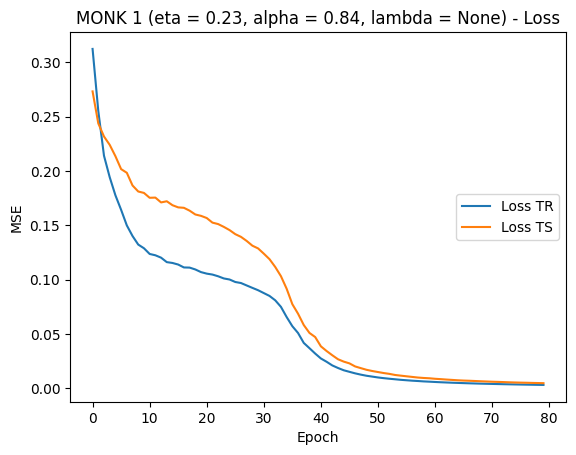

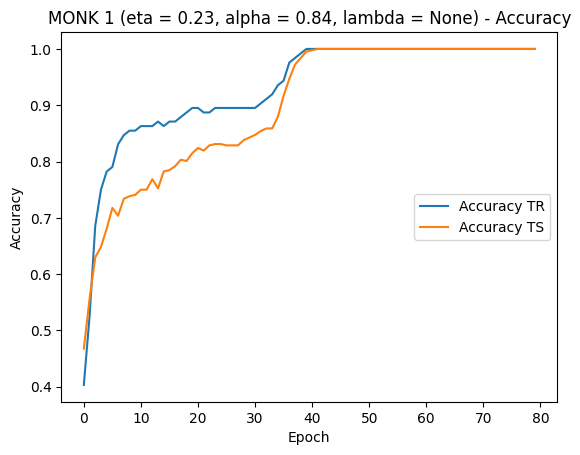

In [91]:
monk_solver(monk_number=1, eta=0.23, alpha=0.84, epochs=80) #this parameters are perfect (I think :D) dont'change them


Epoch 1/100
7/7 - 0s - loss: 0.2565 - accuracy: 0.5917 - val_loss: 0.2307 - val_accuracy: 0.6366 - 316ms/epoch - 45ms/step
Epoch 2/100
7/7 - 0s - loss: 0.2485 - accuracy: 0.5858 - val_loss: 0.2237 - val_accuracy: 0.6551 - 39ms/epoch - 6ms/step
Epoch 3/100
7/7 - 0s - loss: 0.2370 - accuracy: 0.6213 - val_loss: 0.2264 - val_accuracy: 0.6458 - 34ms/epoch - 5ms/step
Epoch 4/100
7/7 - 0s - loss: 0.2343 - accuracy: 0.6450 - val_loss: 0.2229 - val_accuracy: 0.6574 - 35ms/epoch - 5ms/step
Epoch 5/100
7/7 - 0s - loss: 0.2305 - accuracy: 0.6450 - val_loss: 0.2243 - val_accuracy: 0.6505 - 35ms/epoch - 5ms/step
Epoch 6/100
7/7 - 0s - loss: 0.2287 - accuracy: 0.6450 - val_loss: 0.2226 - val_accuracy: 0.6551 - 36ms/epoch - 5ms/step
Epoch 7/100
7/7 - 0s - loss: 0.2271 - accuracy: 0.6568 - val_loss: 0.2216 - val_accuracy: 0.6528 - 34ms/epoch - 5ms/step
Epoch 8/100
7/7 - 0s - loss: 0.2255 - accuracy: 0.6450 - val_loss: 0.2217 - val_accuracy: 0.6505 - 35ms/epoch - 5ms/step
Epoch 9/100
7/7 - 0s - loss: 0

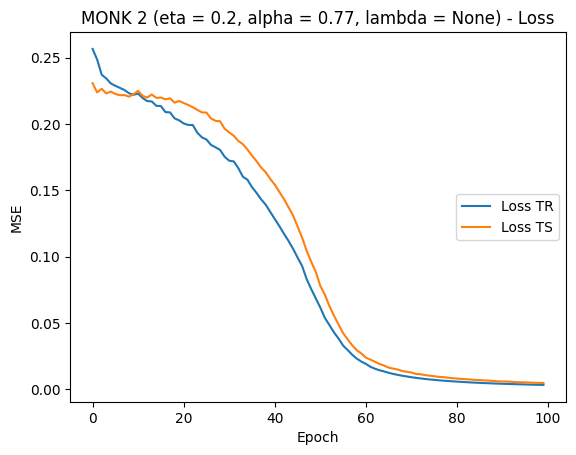

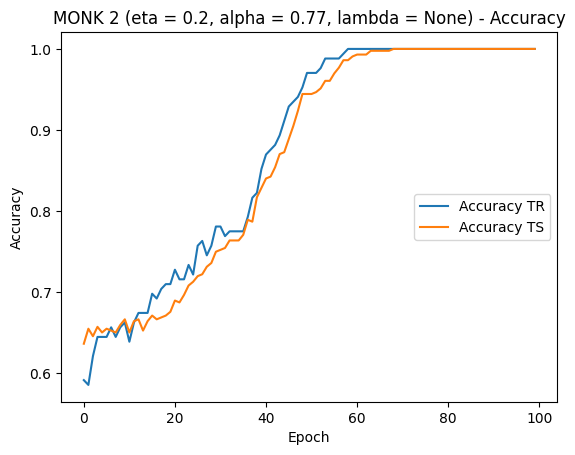

In [94]:
monk_solver(monk_number=2, eta=0.20, alpha=0.77, epochs=100) #idem for this

Epoch 1/105
5/5 - 0s - loss: 0.3031 - accuracy: 0.4754 - val_loss: 0.2765 - val_accuracy: 0.4931 - 326ms/epoch - 65ms/step
Epoch 2/105
5/5 - 0s - loss: 0.2370 - accuracy: 0.6230 - val_loss: 0.1976 - val_accuracy: 0.7153 - 35ms/epoch - 7ms/step
Epoch 3/105
5/5 - 0s - loss: 0.1827 - accuracy: 0.7951 - val_loss: 0.1495 - val_accuracy: 0.8935 - 34ms/epoch - 7ms/step
Epoch 4/105
5/5 - 0s - loss: 0.1454 - accuracy: 0.8770 - val_loss: 0.1162 - val_accuracy: 0.9444 - 33ms/epoch - 7ms/step
Epoch 5/105
5/5 - 0s - loss: 0.1163 - accuracy: 0.9180 - val_loss: 0.0896 - val_accuracy: 0.9676 - 36ms/epoch - 7ms/step
Epoch 6/105
5/5 - 0s - loss: 0.0953 - accuracy: 0.9344 - val_loss: 0.0687 - val_accuracy: 0.9722 - 35ms/epoch - 7ms/step
Epoch 7/105
5/5 - 0s - loss: 0.0807 - accuracy: 0.9344 - val_loss: 0.0565 - val_accuracy: 0.9722 - 34ms/epoch - 7ms/step
Epoch 8/105
5/5 - 0s - loss: 0.0727 - accuracy: 0.9344 - val_loss: 0.0501 - val_accuracy: 0.9722 - 34ms/epoch - 7ms/step
Epoch 9/105
5/5 - 0s - loss: 0

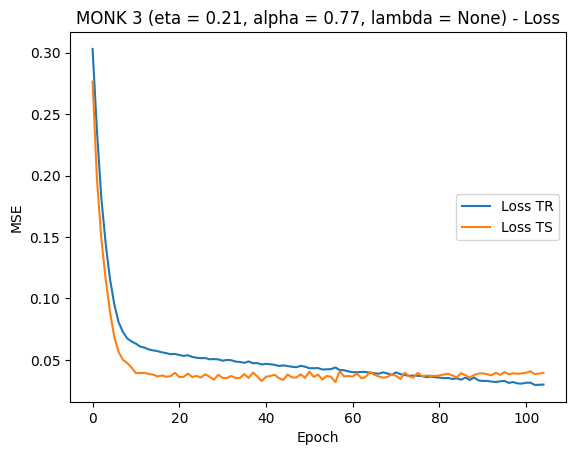

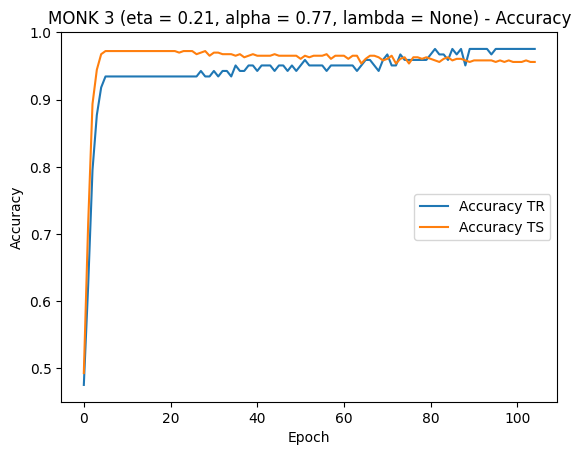

In [95]:
#monk3 this :loss: 0.0184 - accuracy: 0.9836 - val_loss: 0.0231 - val_accuracy: 0.9699 - 32ms/epoch with monk_number=3, eta=0.3, alpha=0.78, epochs=120
monk_solver(monk_number=3, eta=0.21, alpha=0.77, epochs=105) # look nice: 5/5 - 0s - loss: 0.0248 - accuracy: 0.9836 - val_loss: 0.0241 - val_accuracy: 0.9699 - 31ms/epoch - 6ms/step

Epoch 1/200
5/5 - 0s - loss: 0.2652 - accuracy: 0.4836 - val_loss: 0.2524 - val_accuracy: 0.5394 - 306ms/epoch - 61ms/step
Epoch 2/200
5/5 - 0s - loss: 0.2355 - accuracy: 0.5656 - val_loss: 0.2219 - val_accuracy: 0.6481 - 36ms/epoch - 7ms/step
Epoch 3/200
5/5 - 0s - loss: 0.2085 - accuracy: 0.7049 - val_loss: 0.1972 - val_accuracy: 0.7407 - 35ms/epoch - 7ms/step
Epoch 4/200
5/5 - 0s - loss: 0.1820 - accuracy: 0.7951 - val_loss: 0.1720 - val_accuracy: 0.8148 - 35ms/epoch - 7ms/step
Epoch 5/200
5/5 - 0s - loss: 0.1548 - accuracy: 0.8607 - val_loss: 0.1432 - val_accuracy: 0.8750 - 37ms/epoch - 7ms/step
Epoch 6/200
5/5 - 0s - loss: 0.1280 - accuracy: 0.9016 - val_loss: 0.1153 - val_accuracy: 0.9375 - 36ms/epoch - 7ms/step
Epoch 7/200
5/5 - 0s - loss: 0.1077 - accuracy: 0.9262 - val_loss: 0.0939 - val_accuracy: 0.9583 - 36ms/epoch - 7ms/step
Epoch 8/200
5/5 - 0s - loss: 0.0907 - accuracy: 0.9344 - val_loss: 0.0757 - val_accuracy: 0.9699 - 34ms/epoch - 7ms/step
Epoch 9/200
5/5 - 0s - loss: 0

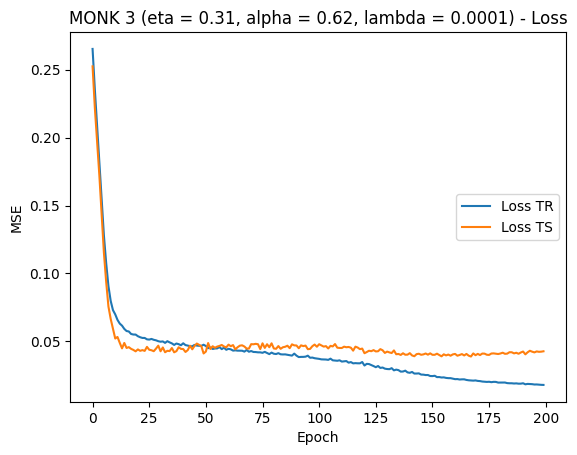

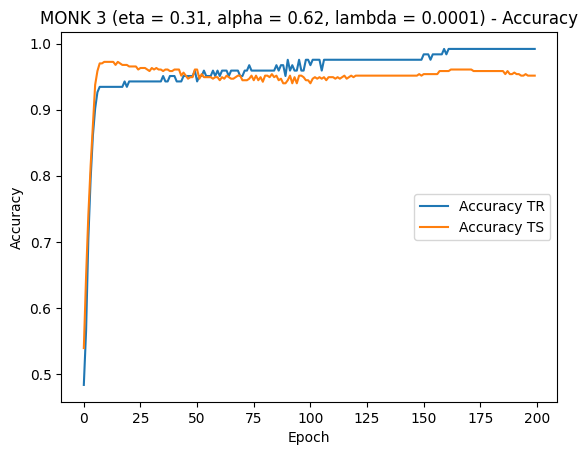

In [98]:
monk_solver(monk_number=3, eta=0.31, alpha=0.62, lmb=0.0001, epochs=200)